In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm
import cv2
 
%matplotlib inline

In [2]:
x,y=680,420

In [3]:
def draw_text(template, font, text, xy, fontsize=40):
    x,y = xy
    font = ImageFont.truetype(font, fontsize)
    if isinstance(template,str):
        img = Image.open(template)
    else:
        img = template
    b,g,r,a = 255,255,255,0
    #fontpath = "fonts/gulim.ttc"
    #font = ImageFont.truetype(fontpath, 20)
    img_pil = img
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y),  text, font=font,fill=1)
    return img_pil



In [4]:
img = draw_text('./template/template-1.png', 'ttf/batang.ttf', text='이상엽',xy=(x,y))

In [5]:
img = draw_text(img, 'ttf/batang.ttf', text='123asb',xy=(315,234))

In [6]:
def resize(img, w_new):

    w,h = img.size
    wph = w/h
    p_new = int(w_new / wph)
    return img.resize((w_new,p_new))

In [7]:
img=resize(img, 600)

In [8]:
def salt_n_pepper(img, s_vs_p = 0.5, amount = 0.003):
    img = img.convert('RGB')
    img_arr = np.array(img)
    row,col,ch = img_arr.shape
    out = np.copy(img_arr)
    # Salt mode
    num_salt = np.ceil(amount * img_arr.size * s_vs_p)
    
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img_arr.shape[:2]]
    
    out[coords] = 1

    # Pepper mode
    num_pepper = np.ceil(amount* img_arr.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img_arr.shape[:2]]
    out[coords] = 0
    return Image.fromarray(out).convert('L')


In [9]:
img = salt_n_pepper(img)

/home/leesy714/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/home/leesy714/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [18]:
def rotate(img, deg):
    img = img.convert('RGBA')    
    rot = img.rotate(deg)
    
    
    fff = Image.new('RGBA', rot.size, (255,)*4)
# create a composite image using the alpha layer of rot as a mask
    out = Image.composite(rot, fff, rot)
    
# save your work (converting back to mode='1' or whatever..)
    return out

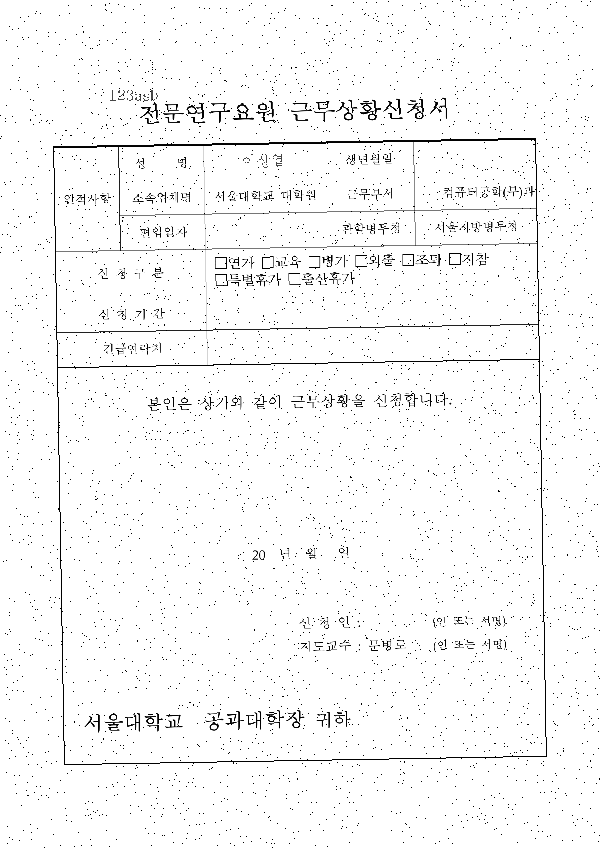

In [19]:
rotate(img,1)